In [6]:
#get some random data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import load_digits
digits = load_digits()

In [7]:
print("images shape: %s" % str(digits.images.shape))
print("targets shape: %s" % str(digits.target.shape))

images shape: (1797, 8, 8)
targets shape: (1797,)


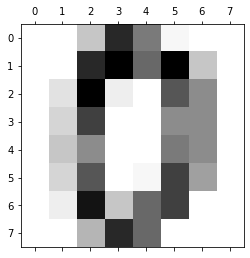

In [8]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys);

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
#Prepare the data
X = digits.data.reshape(-1, 64)
print(X.shape)

(1797, 64)


In [11]:
y= digits.target
print(y.shape)

(1797,)


In [12]:
#X.shape is always (n_samples, n_feature)
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [13]:
#PCA Principal Component Analysis
from sklearn.decomposition import PCA

In [14]:
#Instantine the model. Set parameters
pca = PCA(n_components=2)

In [15]:
#Fit the model
pca.fit(X);

In [16]:
#Apply the model. 
X_pca = pca.transform(X)
X_pca.shape

(1797, 2)

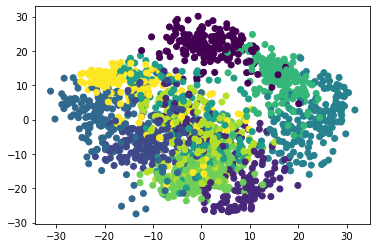

In [17]:
plt.figsize=(16, 10)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

In [18]:
print(pca.mean_.shape)
print(pca.components_.shape)

(64,)
(2, 64)


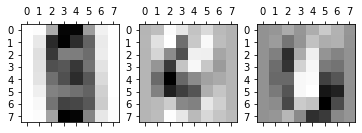

In [19]:
fix, ax = plt.subplots(1, 3)
ax[0].matshow(pca.mean_.reshape(8, 8), cmap=plt.cm.Greys)
ax[1].matshow(pca.components_[0, :].reshape(8, 8), cmap=plt.cm.Greys)
ax[2].matshow(pca.components_[1, :].reshape(8, 8), cmap=plt.cm.Greys)

In [20]:
#Isomap
from sklearn.manifold import Isomap

In [21]:
#Instantiate the model. Set parameters. 
isomap = Isomap(n_components=2, n_neighbors=20)

In [22]:
#Fit the model
isomap.fit(X);

In [23]:
#Apply the model
X_isomap = isomap.transform(X)
X_isomap.shape

(1797, 2)

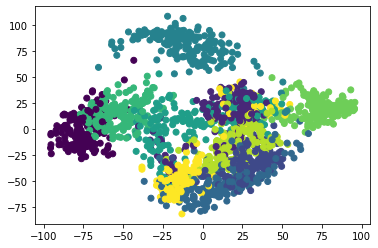

In [24]:
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y);